In [1]:
pip install matplotlib pandas scikit-learn seaborn joblib

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 14.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 12.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 8.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 7.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 5.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.5 MB/s eta 0:00:01
   --------------------------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


**Dataset Overview**

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



# Ensure paths are consistent
data_path = r"D:\Infosys Intern\CreditPathAI_Oct_Batch\kaggle_dataset\data\interim\loan_data_clean.csv"


# Load data
df = pd.read_csv(data_path)

print("="*80)
print("DATASET OVERVIEW")
print("="*80)

# info
print("\nShape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# 2️⃣ Data types
print("\nData Types:\n")
print(df.dtypes)

# descriptive stats
print("\nDescriptive Statistics:\n")
print(df.describe(include='all').transpose().head(10))

# nulls and duplicates overview
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("Duplicate Rows:", df.duplicated().sum())


DATASET OVERVIEW

Shape of dataset: (38480, 37)

Column Names:
 ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'repay_fail']

Data Types:

Unnamed: 0                  int64
id                          int64
member_id                   int64
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
emp_length                 object
home_ownership             o

**Data Quality Assessment**

In [6]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)


next_pymnt_d              35097
mths_since_last_delinq    24363
emp_length                  993
last_pymnt_d                 71
revol_util                   59
revol_bal                     4
last_credit_pull_d            3
annual_inc                    2
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
installment                   1
open_acc                      1
delinq_2yrs                   1
total_acc                     1
pub_rec                       1
inq_last_6mths                1
total_pymnt                   1
total_rec_int                 1
total_rec_prncp               1
total_pymnt_inv               1
last_pymnt_amnt               1
dtype: int64


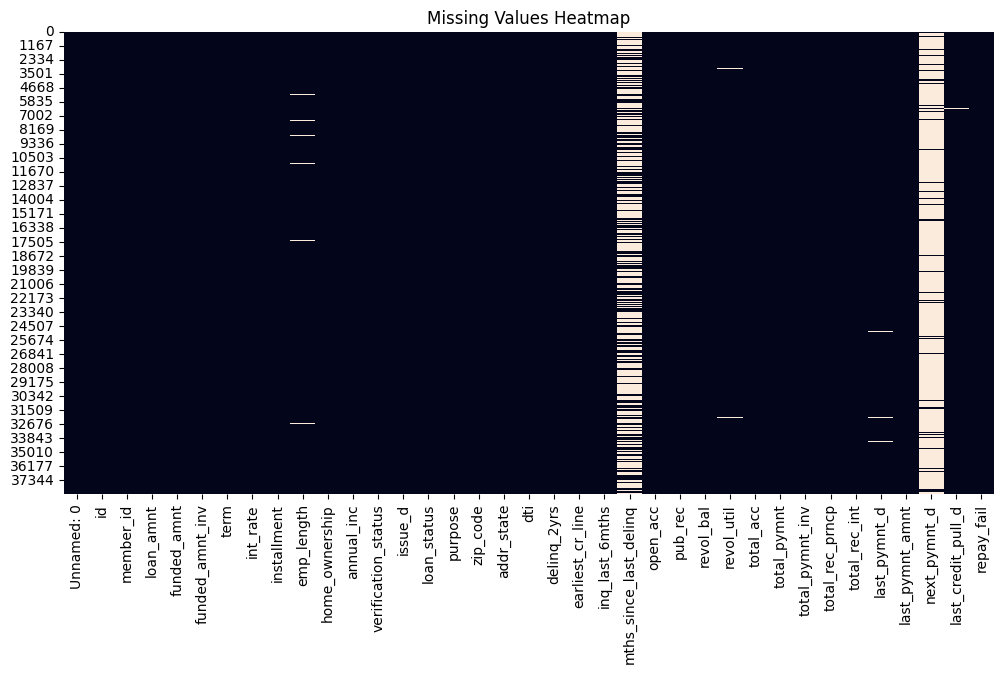

In [8]:

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
#Outlier Detection using IQR

numeric_cols = df.select_dtypes(include='number').columns.tolist()

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
outlier_count = outliers.sum().sort_values(ascending=False)
print("Outliers per column:\n", outlier_count)


Outliers per column:
 repay_fail                5829
delinq_2yrs               4278
last_pymnt_amnt           4240
total_rec_int             3026
revol_bal                 2624
pub_rec                   2139
annual_inc                1844
total_pymnt_inv           1400
total_pymnt               1266
installment               1232
loan_amnt                 1103
funded_amnt_inv           1043
funded_amnt                931
total_rec_prncp            930
inq_last_6mths             706
open_acc                   566
total_acc                  549
int_rate                    89
mths_since_last_delinq       4
id                           2
member_id                    2
dti                          1
Unnamed: 0                   0
dtype: int64


**Data Understanding**


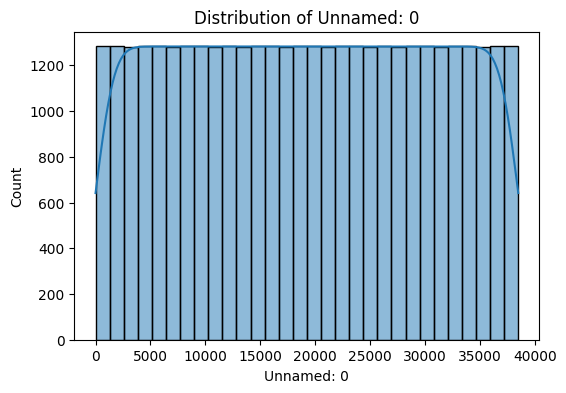

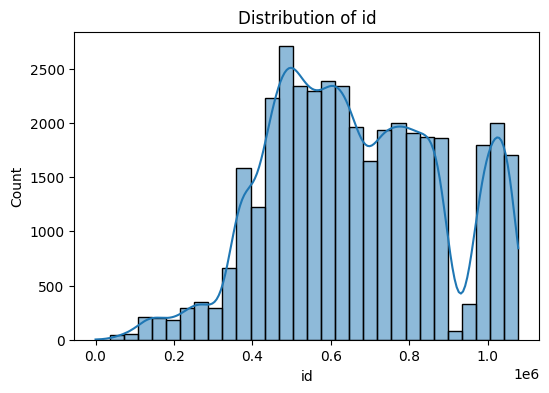

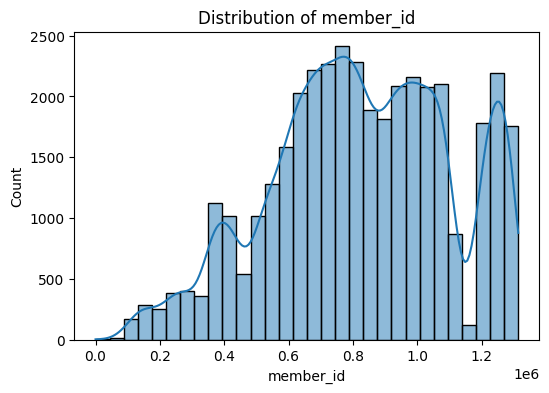

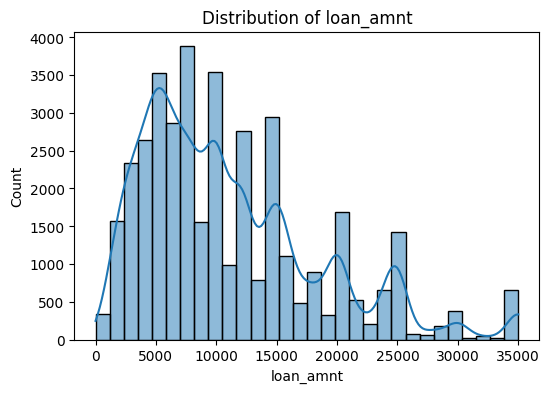

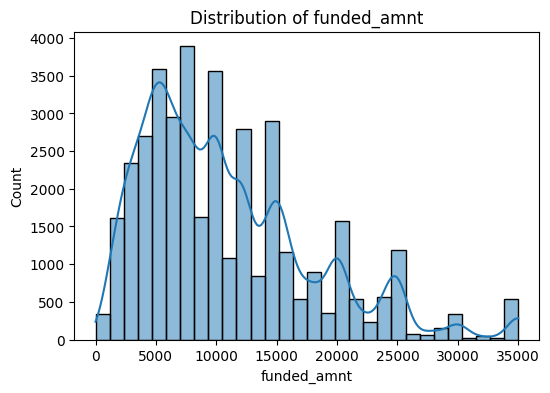

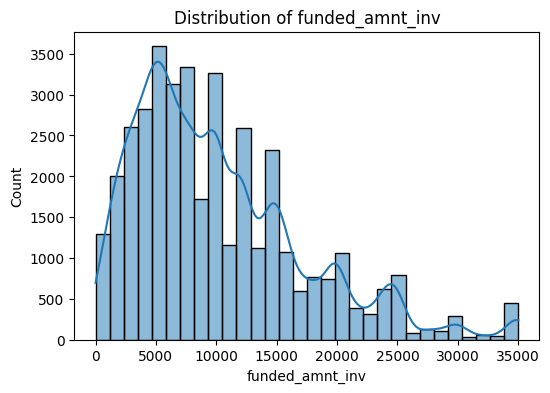

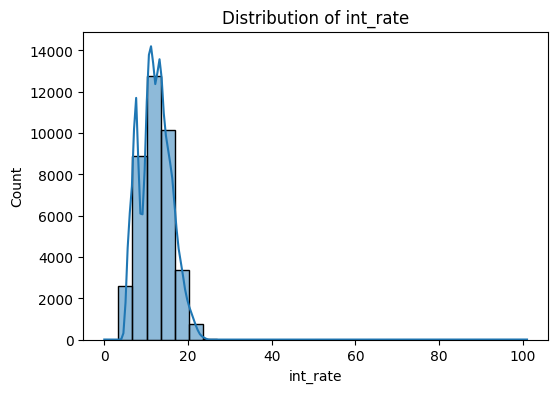

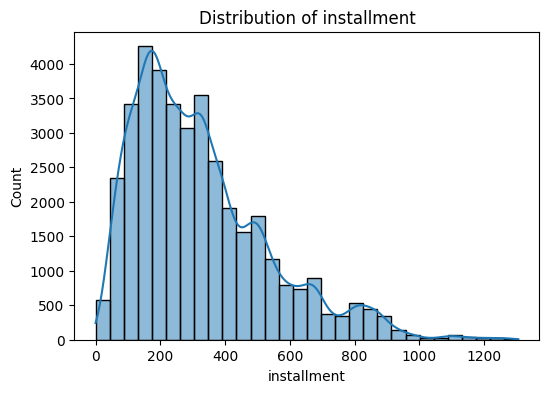

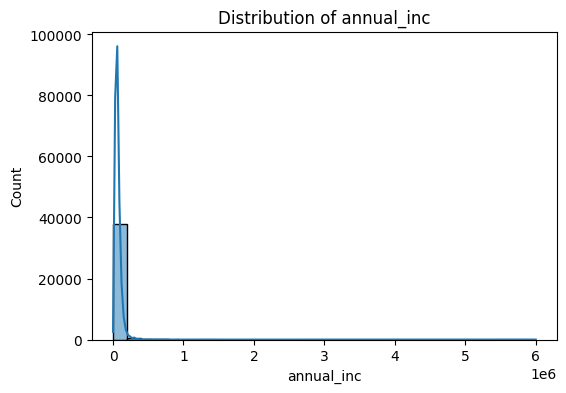

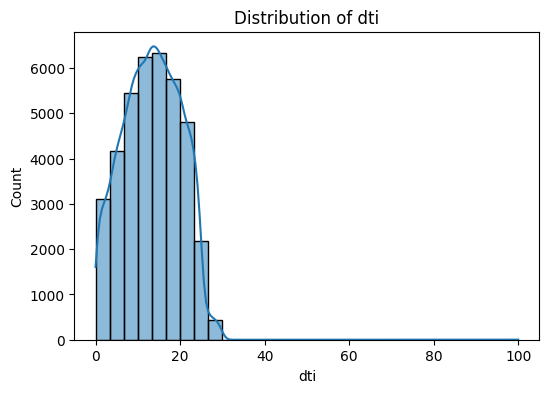

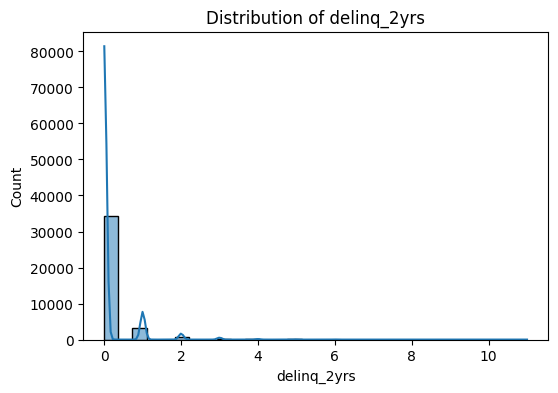

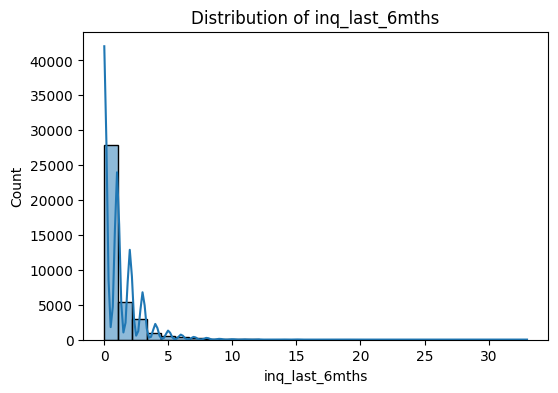

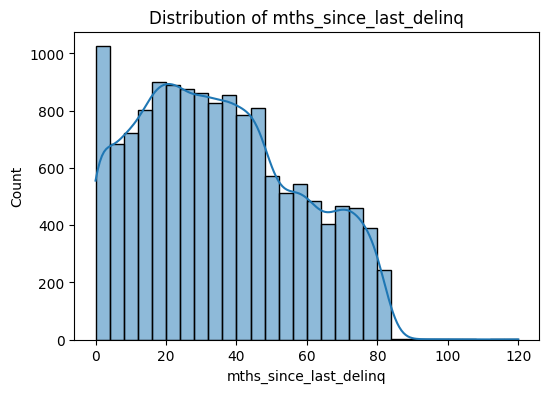

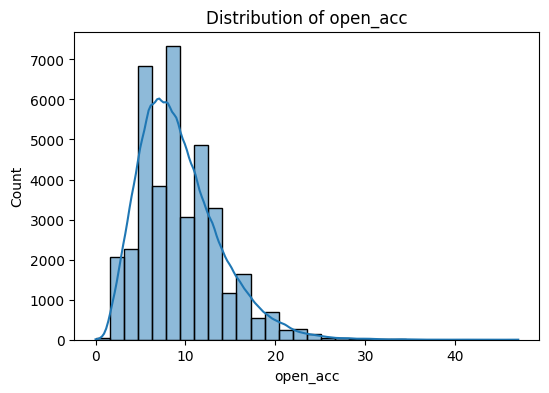

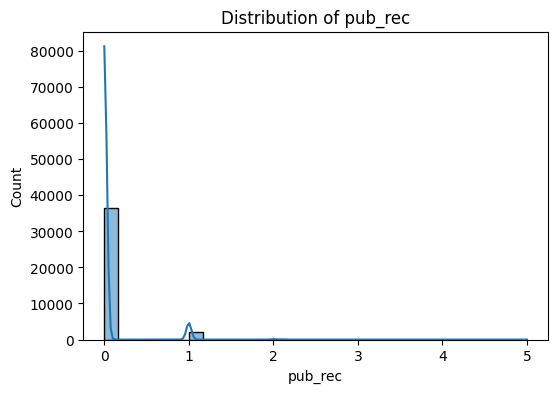

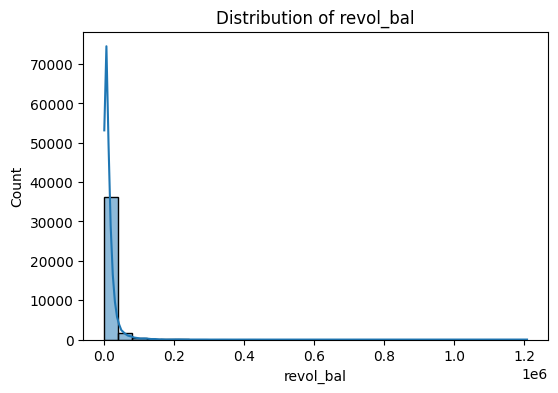

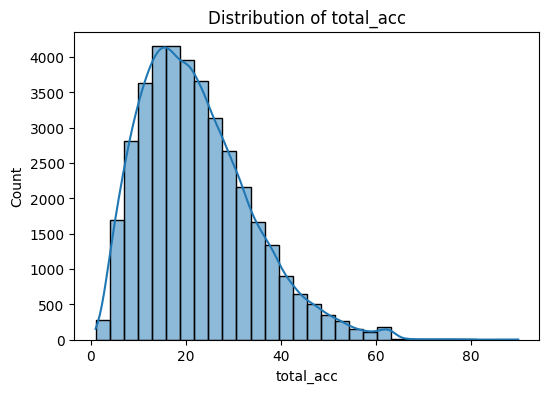

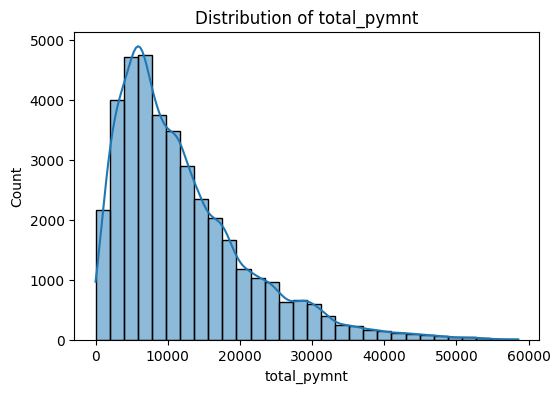

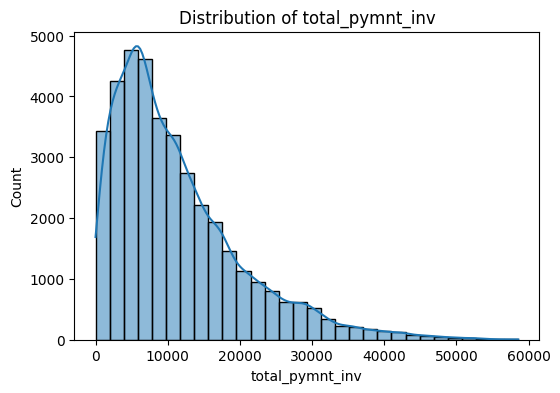

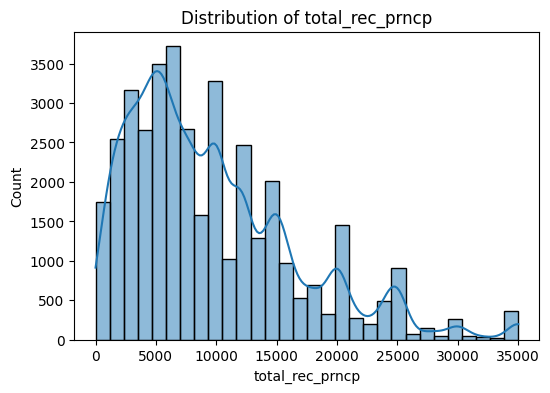

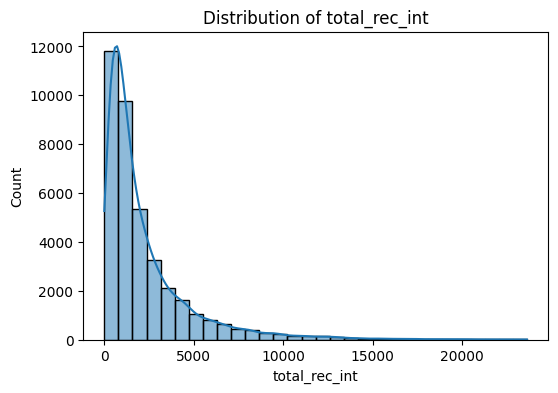

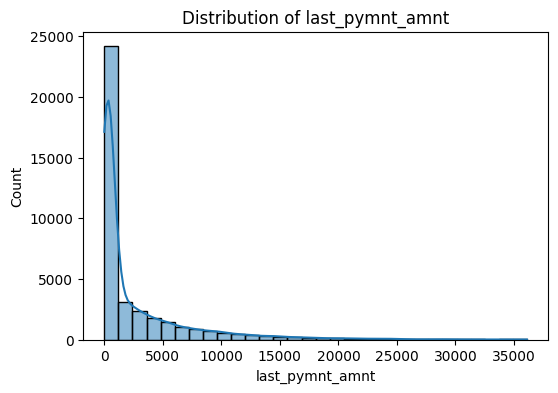

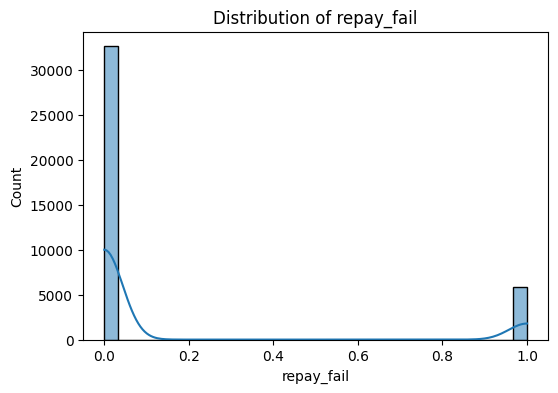

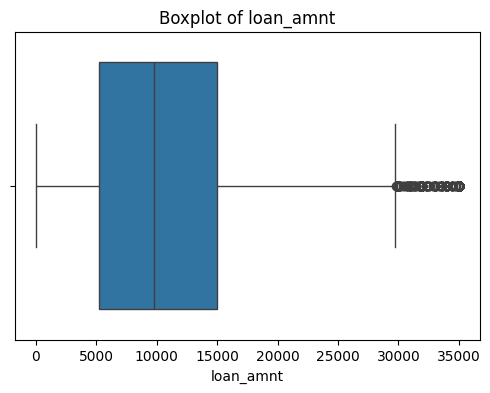

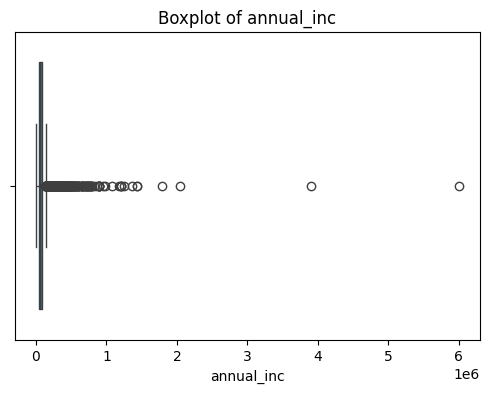

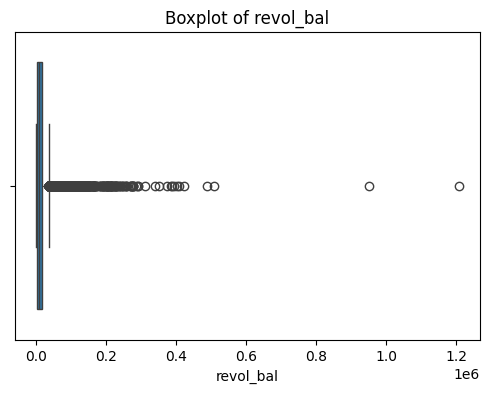

In [ ]:
#Univariate analysis

#Histograms and Skewness

print("Histogram and Skewness of Numeric Features:")

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    data = df[col].dropna()
    skew_val = data.skew()
    sns.histplot(data, bins=30, kde=True, color='skyblue')
    
    plt.title(f"Distribution of {col}\nSkewness = {skew_val:.2f}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Highlighting the highly skewed
    if abs(skew_val) > 1:
        plt.text(x=data.mean(), y=plt.ylim()[1]*0.9, 
                 s="Highly Skewed", 
                 color="red", fontsize=10, ha="center", weight="bold")
    
    plt.show()


# Boxplots 
for col in ['loan_amnt', 'annual_inc', 'revol_bal']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

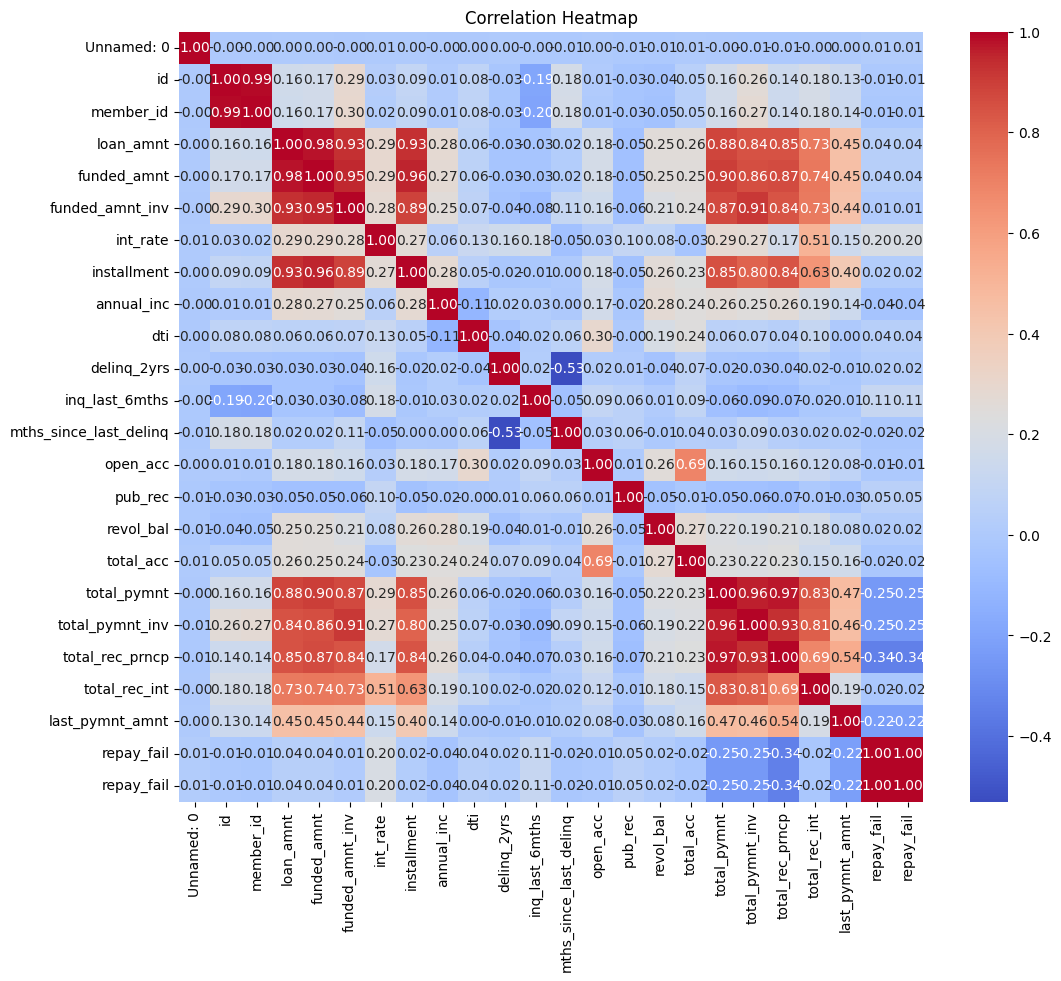

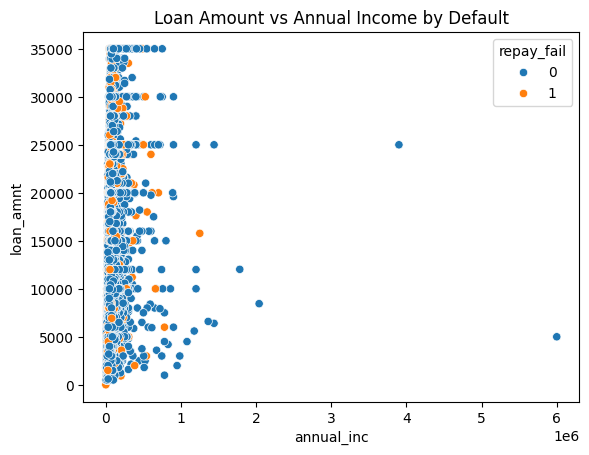


Value counts for term:
term
36 months    28593
60 months     9887
Name: count, dtype: int64


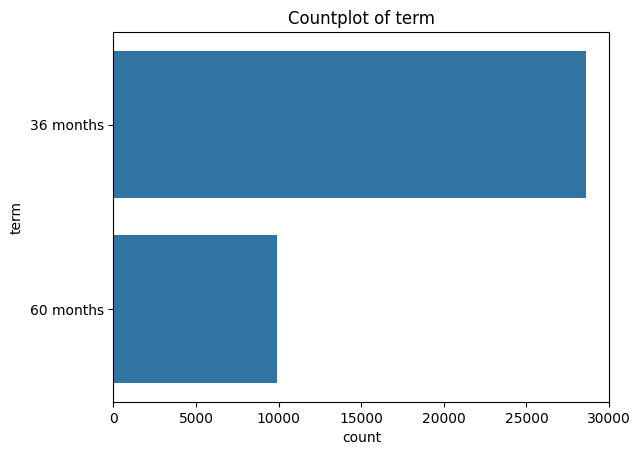


Value counts for emp_length:
emp_length
10+ years    8465
< 1 year     4565
2 years      4292
3 years      3939
4 years      3314
1 year       3254
5 years      3171
6 years      2144
7 years      1702
8 years      1445
9 years      1196
Name: count, dtype: int64


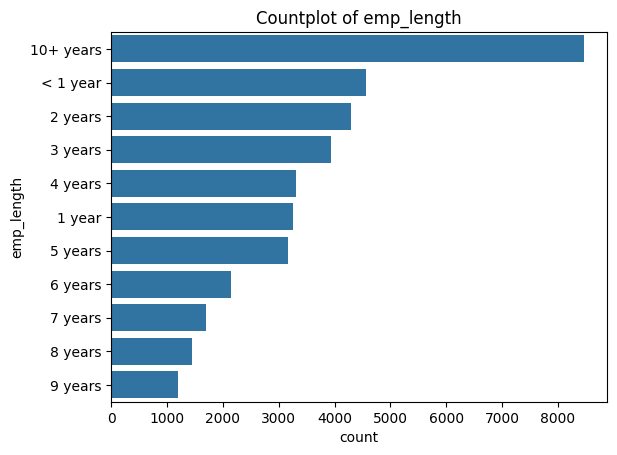


Value counts for home_ownership:
home_ownership
RENT        18253
MORTGAGE    17140
OWN          2958
OTHER         125
NONE            4
Name: count, dtype: int64


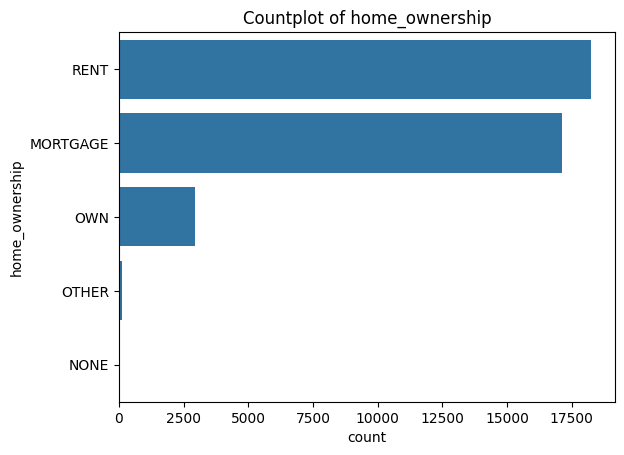


Value counts for verification_status:
verification_status
Not Verified       16962
Verified           12170
Source Verified     9348
Name: count, dtype: int64


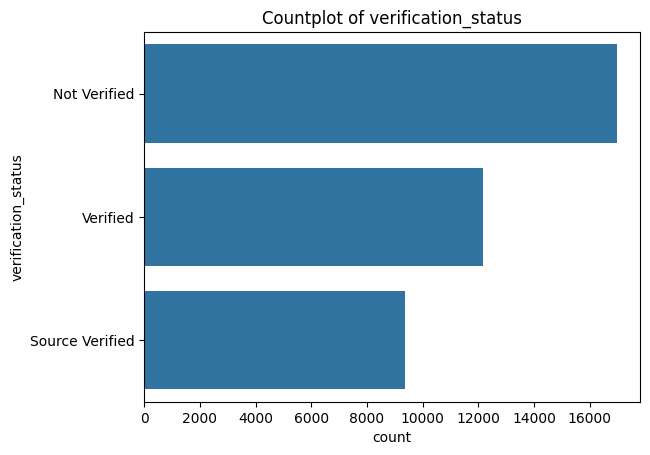


Value counts for issue_d:
issue_d
Nov-11    2068
Dec-11    2056
Oct-11    1922
Sep-11    1852
Aug-11    1745
Jul-11    1672
Jun-11    1644
May-11    1544
Apr-11    1405
Mar-11    1300
Jan-11    1255
Dec-10    1208
Feb-11    1184
Oct-10    1120
Jul-10    1099
Nov-10    1097
Sep-10    1069
Aug-10    1069
Jun-10     993
May-10     896
Apr-10     832
Mar-10     748
Feb-10     620
Nov-09     601
Jan-10     595
Dec-09     592
Oct-09     551
Sep-09     460
Aug-09     400
Jul-09     385
Jun-09     374
Mar-08     369
May-09     328
Apr-09     303
Mar-09     289
Feb-08     284
Jan-08     276
Feb-09     269
Jan-09     252
Apr-08     233
Dec-08     228
Nov-08     185
Dec-07     156
Jul-08     127
Jun-08     112
Oct-08     111
May-08     102
Nov-07     101
Oct-07     100
Aug-08      86
Aug-07      61
Sep-08      54
Jul-07      53
Sep-07      41
Jun-07       2
Dec-99       1
Jan-07       1
Name: count, dtype: int64


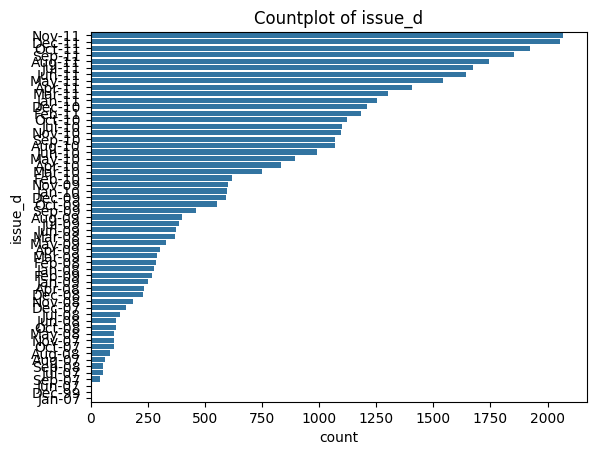


Value counts for loan_status:
loan_status
Fully Paid                                             29987
Charged Off                                             5111
Does not meet the credit policy. Status:Fully Paid      1782
Current                                                  867
Does not meet the credit policy. Status:Charged Off      689
Late (31-120 days)                                        20
In Grace Period                                           15
Late (16-30 days)                                          7
Default                                                    2
Name: count, dtype: int64


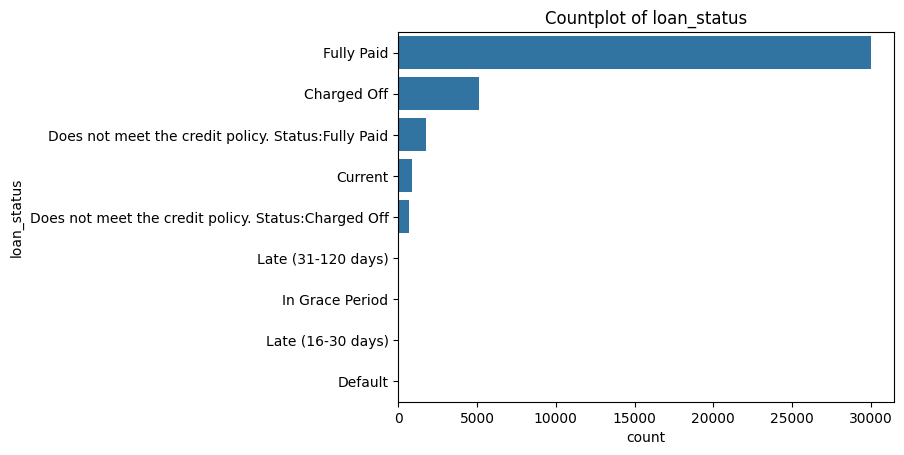


Value counts for purpose:
purpose
debt_consolidation    17917
credit_card            4974
other                  3950
home_improvement       2901
major_purchase         2079
small_business         1808
car                    1481
wedding                 909
medical                 675
moving                  562
house                   387
educational             386
vacation                360
renewable_energy         91
Name: count, dtype: int64


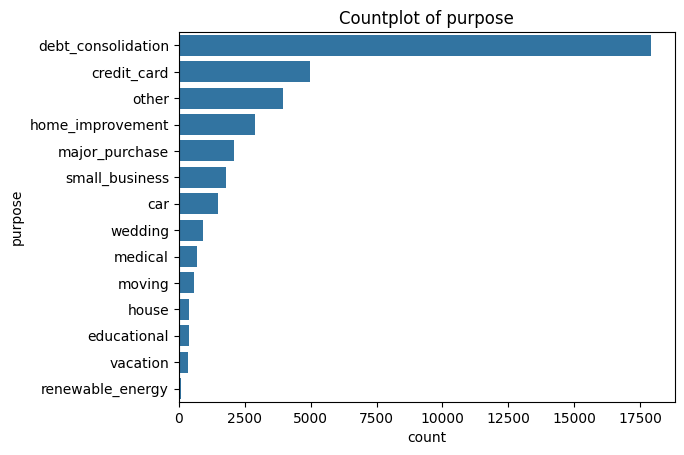


Value counts for zip_code:
zip_code
100xx    573
945xx    502
606xx    499
112xx    492
070xx    447
        ... 
408xx      1
375xx      1
000xx      1
386xx      1
044xx      1
Name: count, Length: 834, dtype: int64


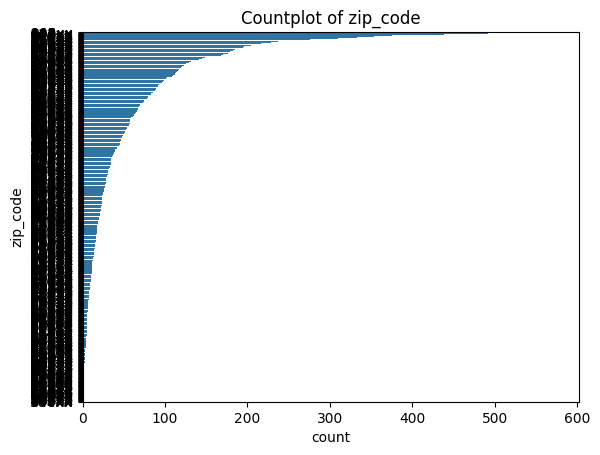


Value counts for addr_state:
addr_state
CA    6754
NY    3702
FL    2803
TX    2633
NJ    1795
IL    1523
PA    1491
GA    1371
VA    1343
MA    1285
OH    1209
MD    1010
AZ     856
WA     798
CO     771
NC     747
CT     722
MI     708
MO     677
MN     597
NV     485
WI     473
AL     439
SC     438
OR     419
LA     415
KY     313
OK     284
KS     271
UT     254
AR     238
DC     196
NM     186
RI     186
NH     170
HI     168
WV     166
DE     124
MT      88
WY      78
AK      77
SD      57
VT      52
TN      30
MS      24
IN      19
IA      12
NE      10
ID       8
ME       3
ZZ       1
AA       1
Name: count, dtype: int64


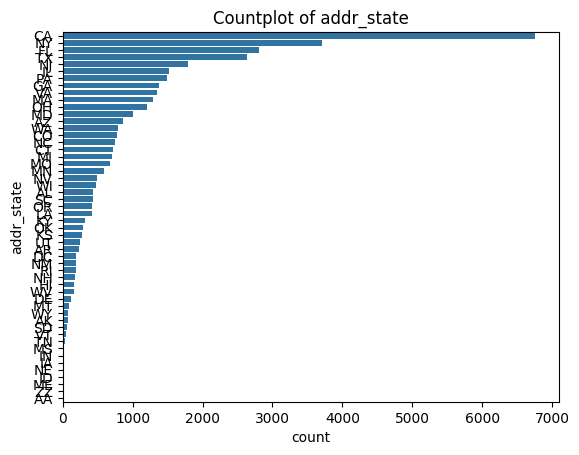


Value counts for earliest_cr_line:
earliest_cr_line
Nov-98    352
Oct-99    351
Oct-00    339
Dec-98    326
Nov-99    314
         ... 
Feb-67      1
Nov-61      1
Jun-68      1
Jun-59      1
Feb-66      1
Name: count, Length: 528, dtype: int64


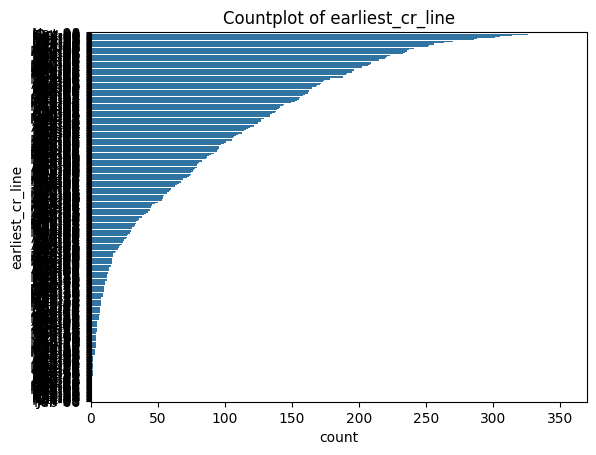


Value counts for revol_util:
revol_util
0%        949
0.20%      60
0.10%      60
70.40%     59
35.30%     57
         ... 
18.82%      1
0.12%       1
29.77%      1
36.88%      1
16.02%      1
Name: count, Length: 1109, dtype: int64


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


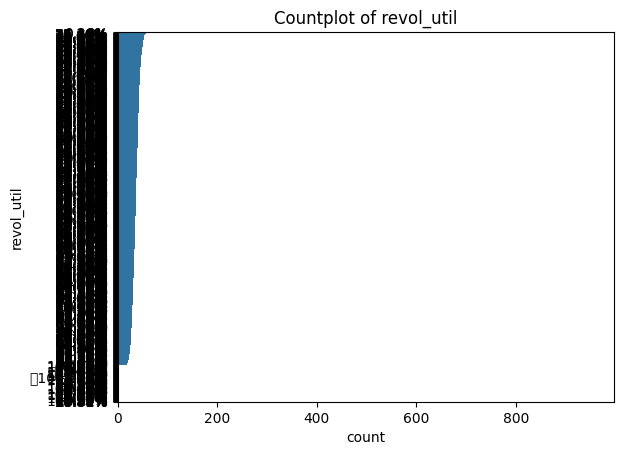


Value counts for last_pymnt_d:
last_pymnt_d
Jun-16    1022
Mar-13     966
Dec-14     870
May-13     856
Feb-13     808
          ... 
Jan-08       8
Feb-08       6
Dec-07       2
Jan-99       1
Jan-07       1
Name: count, Length: 105, dtype: int64


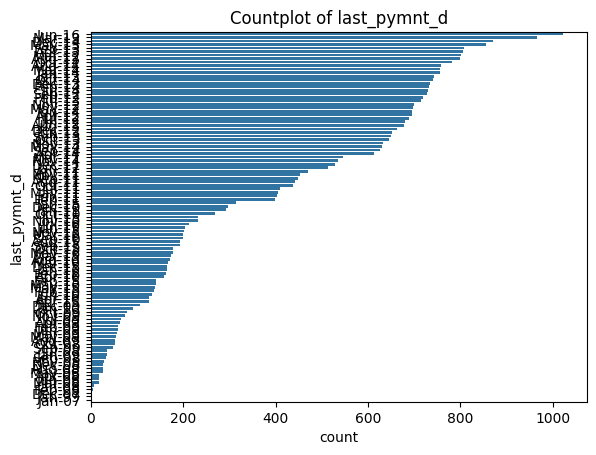


Value counts for next_pymnt_d:
next_pymnt_d
Jul-16    909
Mar-11    100
Apr-11     87
Feb-11     85
Jan-11     72
         ... 
Feb-08      1
Mar-15      1
Jun-16      1
Dec-07      1
Sep-14      1
Name: count, Length: 103, dtype: int64


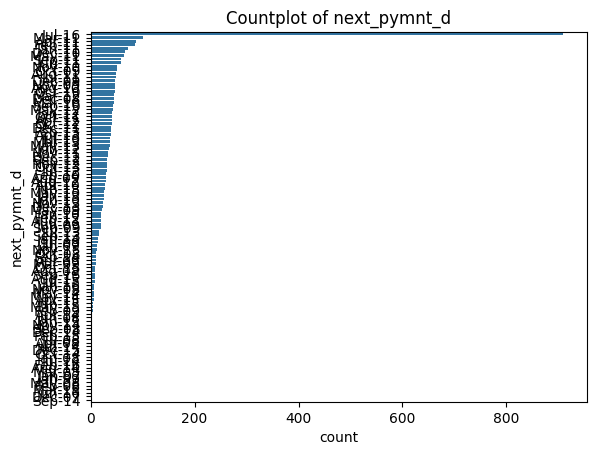


Value counts for last_credit_pull_d:
last_credit_pull_d
Jun-16    11342
Mar-16     1015
Apr-16      816
Feb-13      794
May-16      695
          ...  
May-07        1
Jul-07        1
Jul-08        1
Jun-08        1
May-08        1
Name: count, Length: 110, dtype: int64


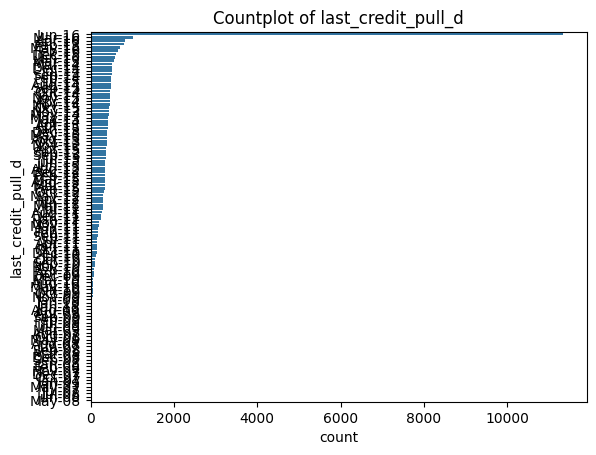

In [ ]:
#Bivariate analysis
# Correlation matrix

plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols + ['repay_fail']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Scatter plots
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='repay_fail', data=df)
plt.title('Loan Amount vs Annual Income by Default')
plt.show()


#Categorical

categorical_cols = df.select_dtypes(include='object').columns.tolist()


for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

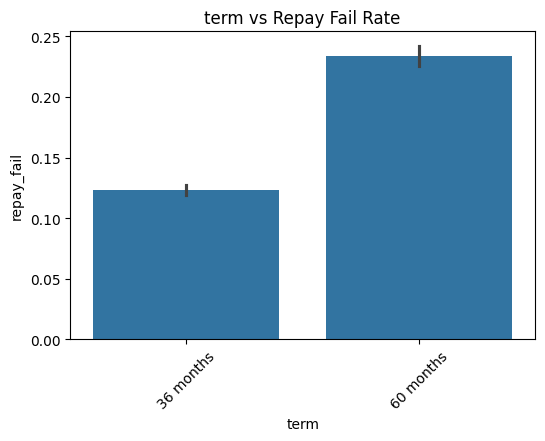

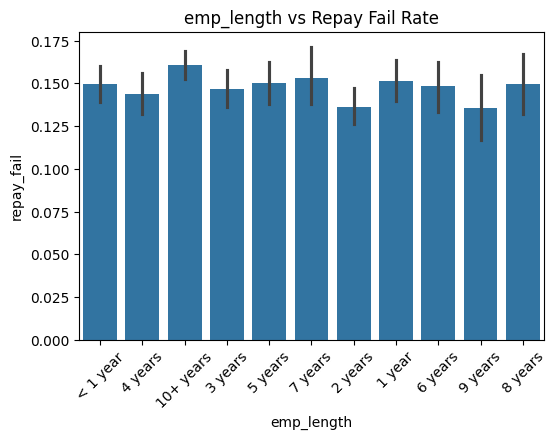

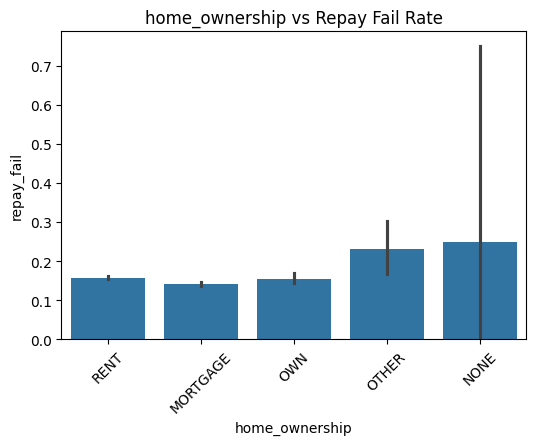

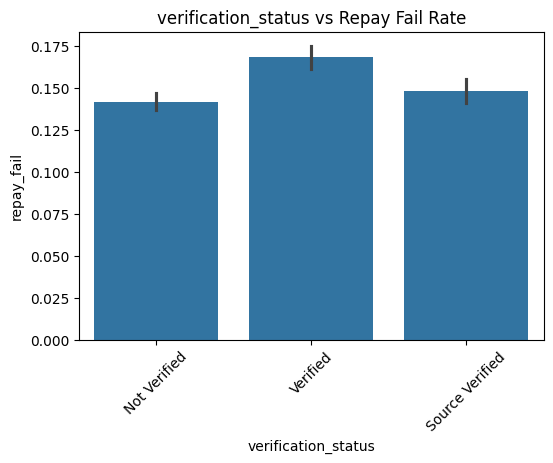

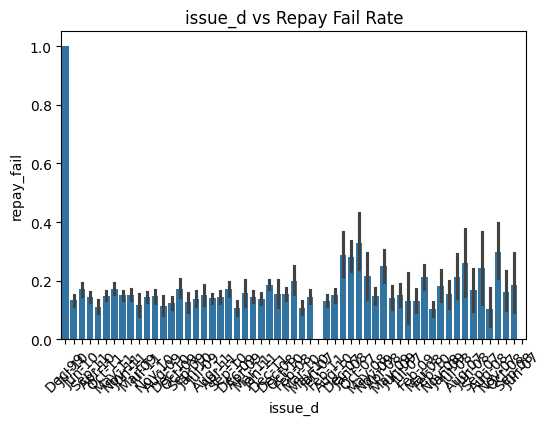

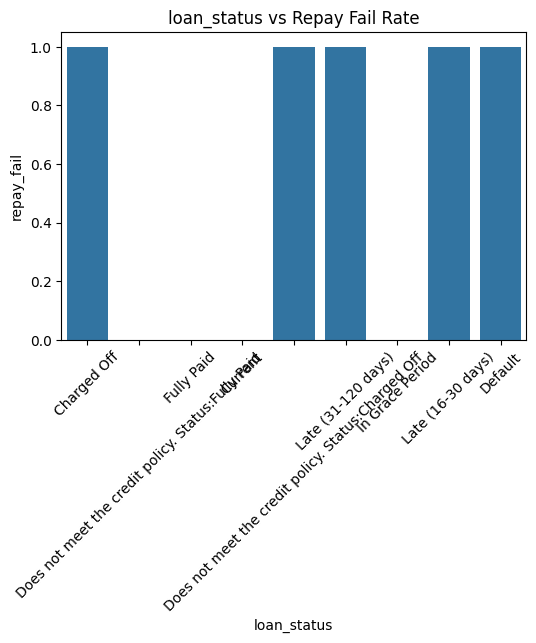

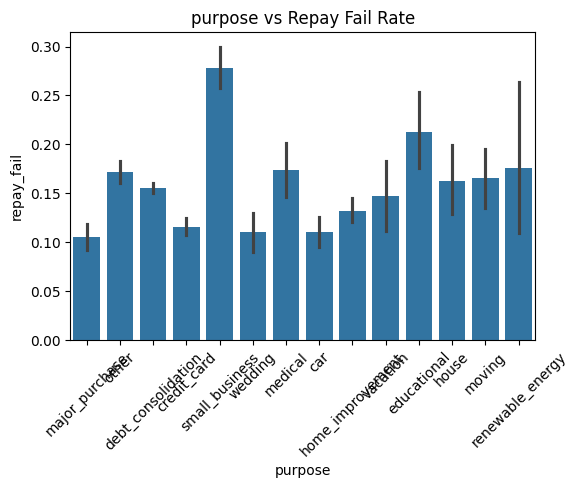

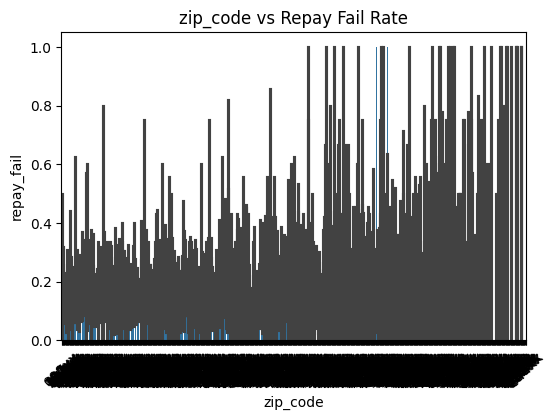

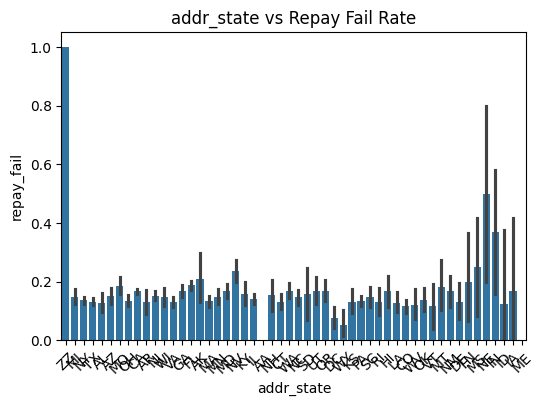

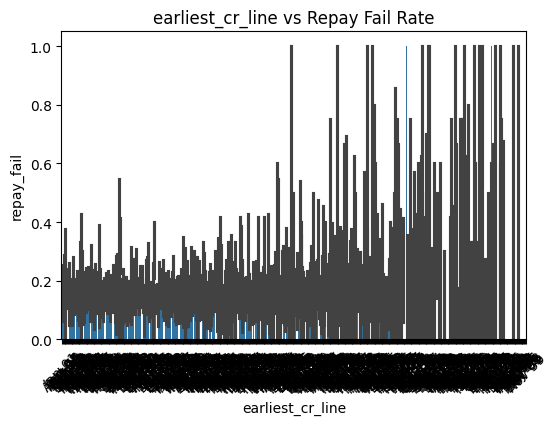

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


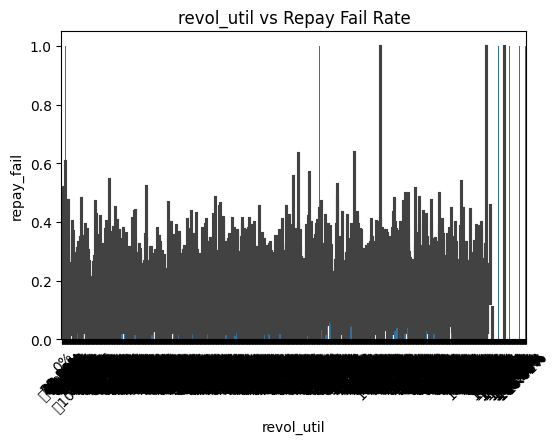

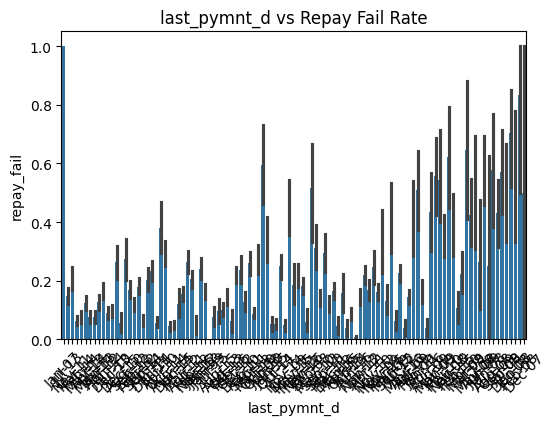

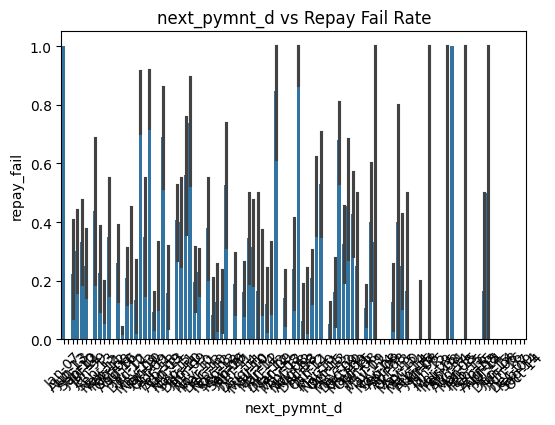

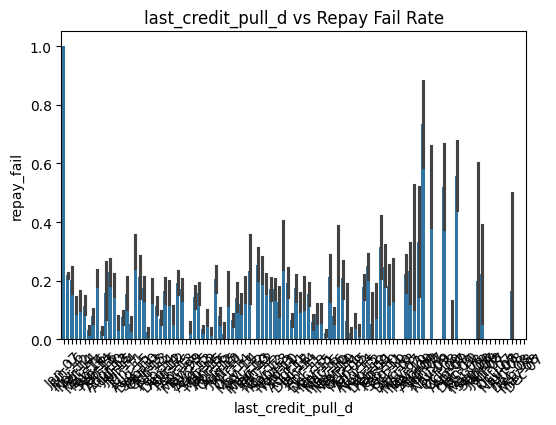

In [15]:
#Categorical vs target
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='repay_fail', data=df)
    plt.title(f'{col} vs Repay Fail Rate')
    plt.xticks(rotation=45)
    plt.show()


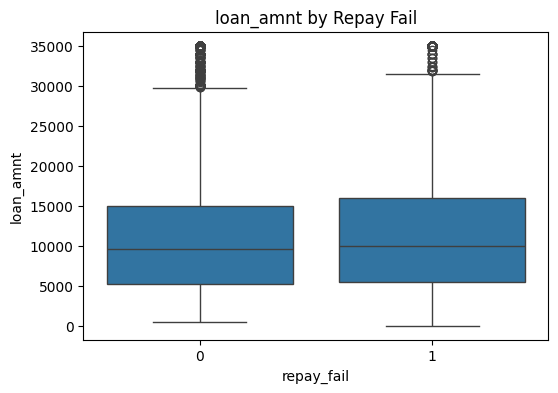

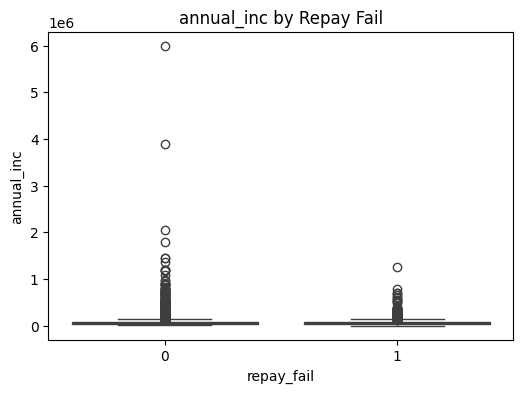

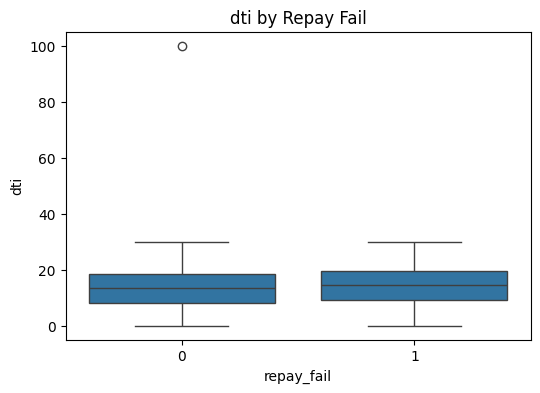

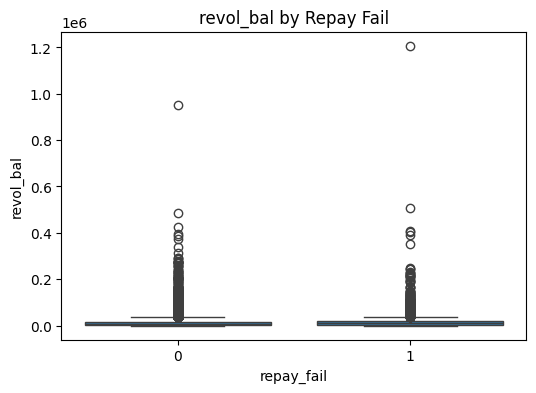

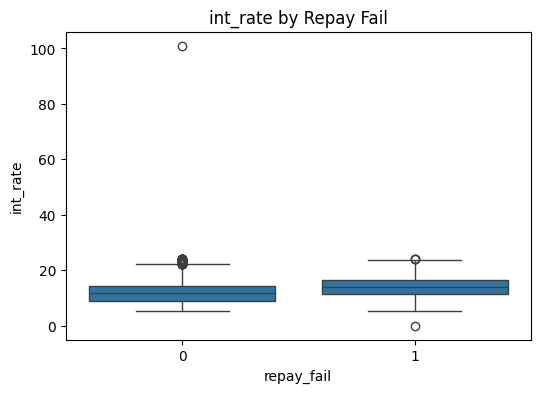

In [16]:
#Numeric vs Target
for col in ['loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'int_rate']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='repay_fail', y=col, data=df)
    plt.title(f'{col} by Repay Fail')
    plt.show()


**Other Analysis**

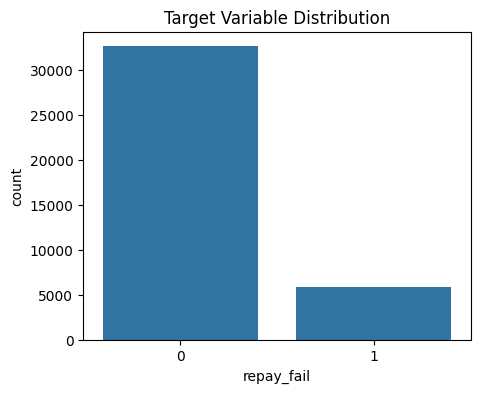

Target counts:
repay_fail
0    32651
1     5829
Name: count, dtype: int64

Target percentage:
repay_fail
0    84.851871
1    15.148129
Name: proportion, dtype: float64


In [23]:
#Target variable anlaysis

target_col = 'repay_fail'

plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()

target_counts = df[target_col].value_counts()
target_percent = df[target_col].value_counts(normalize=True) * 100
print(f"Target counts:\n{target_counts}")
print(f"\nTarget percentage:\n{target_percent}")


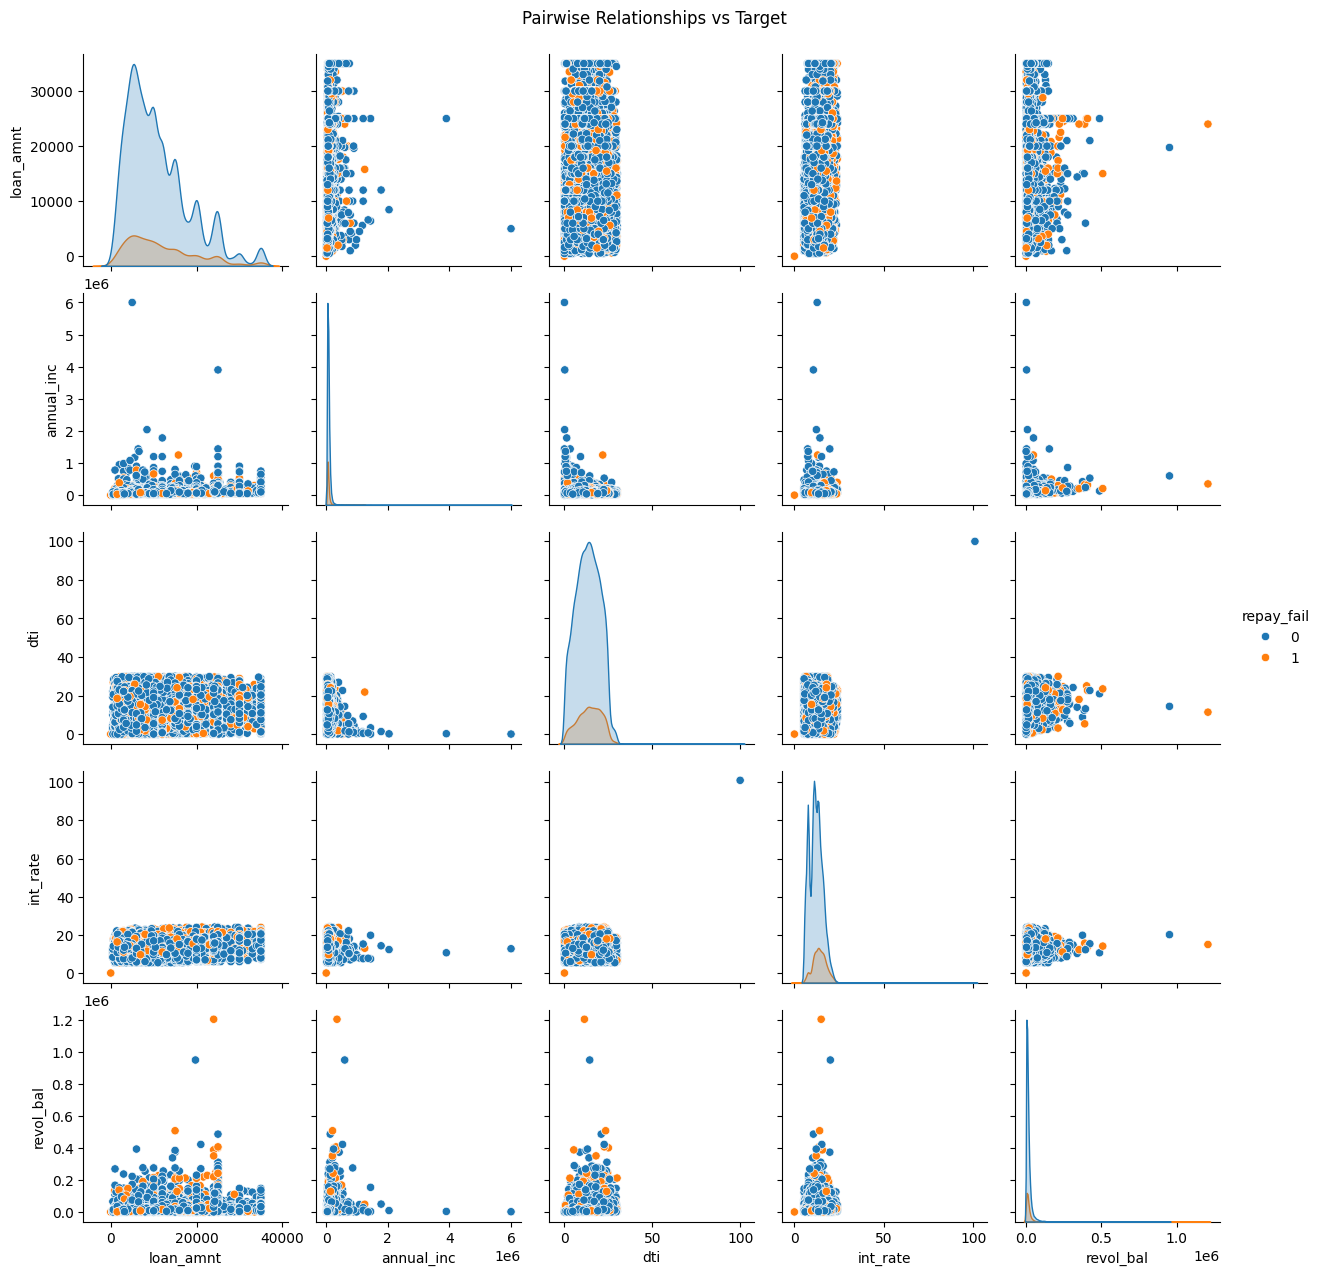

In [24]:
#Pairwise Relationships

#Pairwise correlation scatterplots for key features vs target

key_features = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'revol_bal']
sns.pairplot(df[key_features + [target_col]], hue=target_col, diag_kind='kde', height=2.5)
plt.suptitle("Pairwise Relationships vs Target", y=1.02)
plt.show()

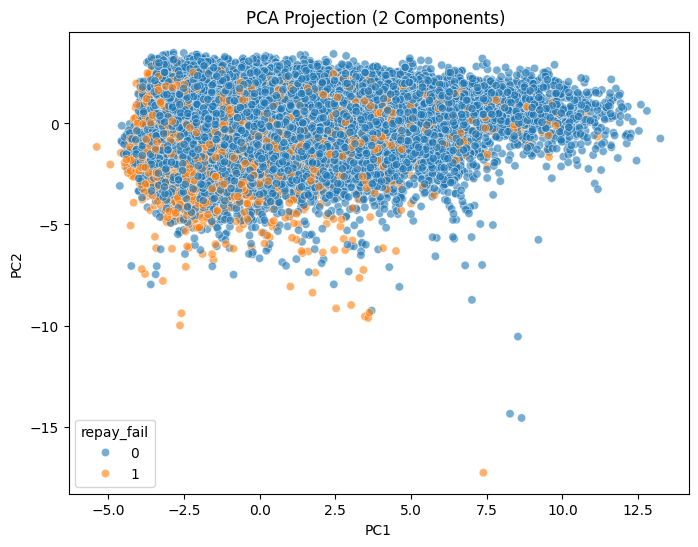

In [26]:
#PCA 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols].fillna(0))

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df[target_col], alpha=0.6)
plt.title("PCA Projection (2 Components) ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()